### Numerical vs. Numerical
1. Scatterplot
2. Line Plot
3. Heatmap for correlation
4. Joint plot

### Categorical vs. Numerical
1. Bar Chart
2. Violin Chart
3. Categorical Box Plot
4. Swarm Plot

### Two Categorical Variables
1. Bar Chart
2. Grouped Bar Chart
3. Point Plot

# Case Study 
### Suicide Rates Overview 1985 to 2016

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('master.csv')

data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [2]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [4]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
data.shape

(27820, 12)

In [7]:
data.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.9+ MB


In [10]:
# checking dataset missing values 

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) # Total # of null values 
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # percentage of values that are null
    missing_data = pd.concat([total,percent],axis=1,keys=['Total', 'Percent']) # Combining total and percent
    return missing_data 
missing_check(data)

,Total,Percent
HDI for year,19456,0.699353
generation,0,0.000000
gdp_per_capita ($),0,0.000000
gdp_for_year ($),0,0.000000
country-year,0,0.000000
suicides/100k pop,0,0.000000
population,0,0.000000
suicides_no,0,0.000000
age,0,0.000000
sex,0,0.000000


In [11]:
data[['suicides_no','population','suicides/100k pop','gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


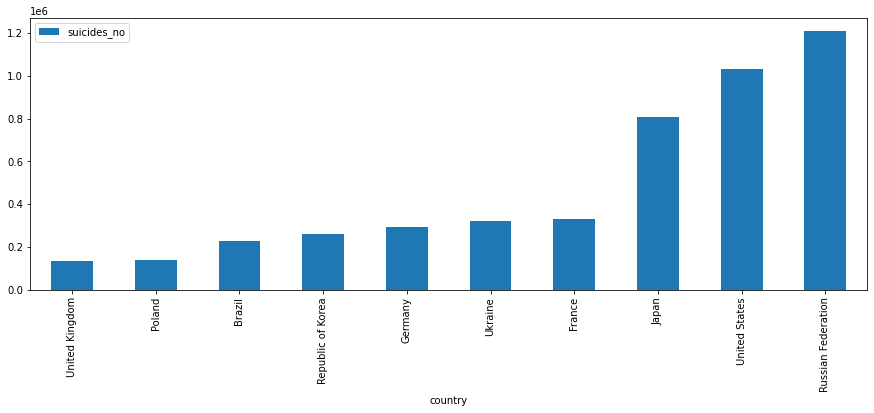

In [12]:
# An example of Numerical Vs Categorical 

data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no']).tail(10).plot(x='country',y='suicides_no',
                                                                                                          kind='bar',
                                                                                                          figsize=(15,5))
plt.show()

* Russia has the highest number of suicides followed by the US and Japan
* Russia, the US and Japan have exceptionally high counts of suicides compared to other in the lot

# Bar plot to check number of suicides by bottom countries

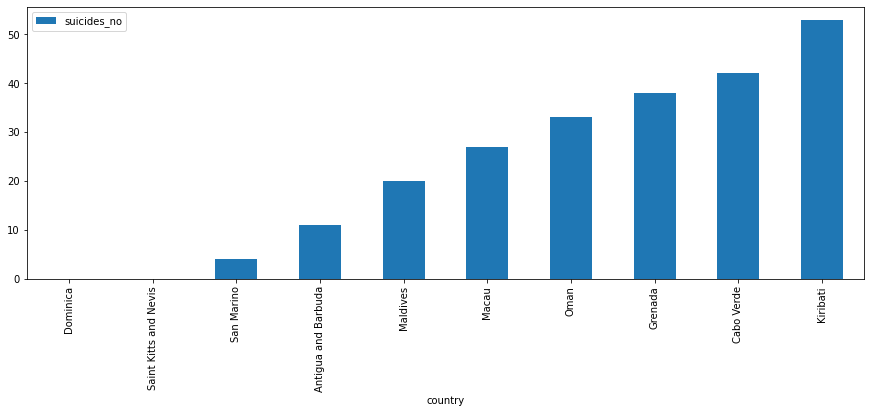

In [14]:
data.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                                                                           ascending=True).head(10).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))
plt.show()

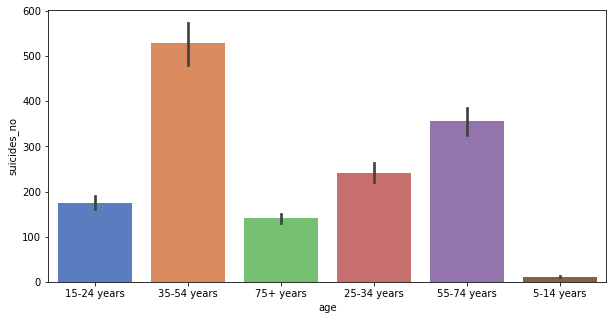

In [15]:
plt.figure(figsize=(10,5)) 
ax = sns.barplot(x='age',y='suicides_no', data=data, palette='muted')

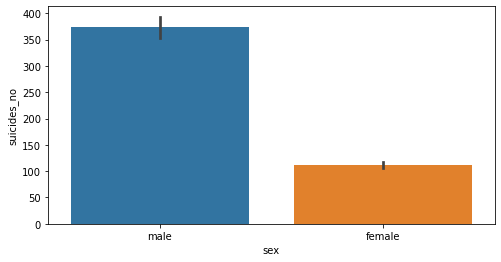

In [16]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x='sex',y='suicides_no',data=data)

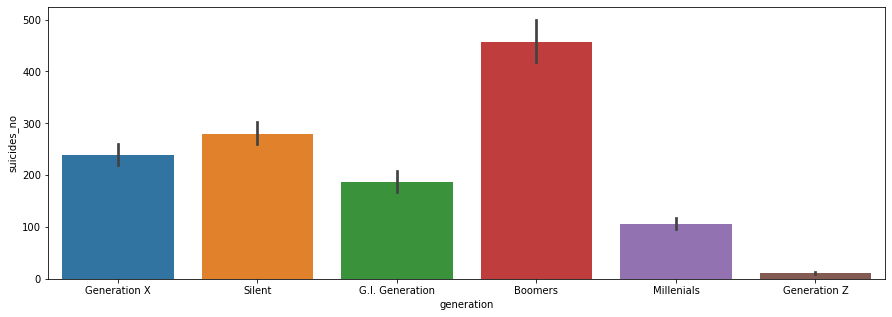

In [17]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='generation', y='suicides_no',data=data)

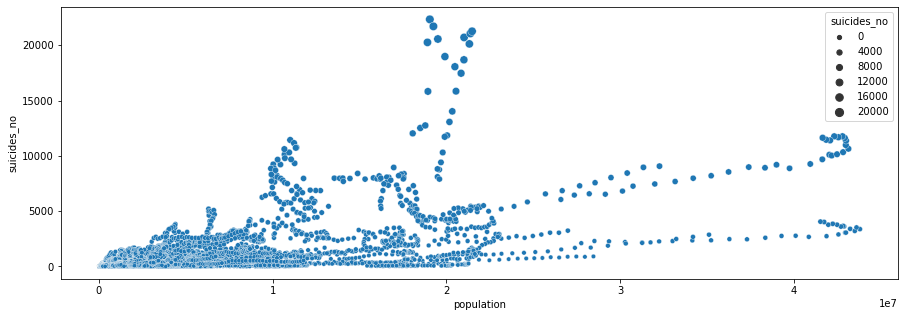

In [18]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=data['population'],y='suicides_no',data=data,size="suicides_no")

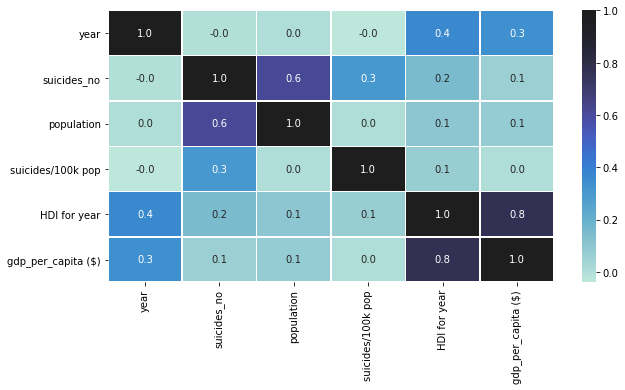

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt='.1f', center=1)
plt.show()

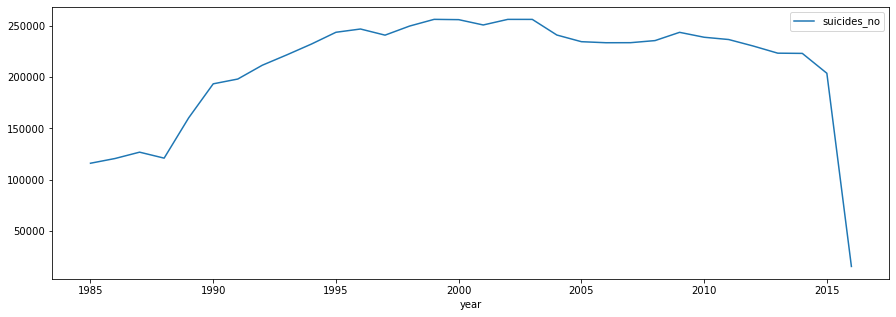

In [22]:
data[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()


# Pandas Profiling with IPL data
Generates profile reports from a pandas dataframe.pandas_profiling extends the pandas DataFrame with df.profile_report() for a quick data analysis 